# Tran Quoc Long - 14520490

## Clustering with face datasets

## Step in brief

	1. Devide examied window into cells (16x16)
	2. For each pixel in a cell, compare to 8 neighbor, Follow along a circle
	3. Assign "number" "0" for pixel whose value is greater than the center, and "1" for the others
	4. Compute the histogram of frequency of each "number" occuring -> 16*16 = 256-demensional feature vector
	5. Optionaly normalize the histogram
	6. Concatenate (normalized) histogram of all cells -> Feature vector  for entire window
	

In [28]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [29]:
# load data set
lfw_people = fetch_lfw_people()

In [30]:
lfw_people.images.shape

(13233, 62, 47)

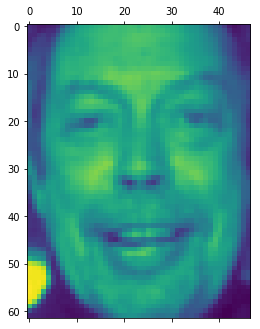

In [31]:
%matplotlib inline
plt.matshow(lfw_people.images[0])

In [32]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

### Test functions on 1 image

In [33]:
from skimage.feature import local_binary_pattern 

In [34]:
# settings for LBP
radius = 4
n_points = 8 
METHOD = 'uniform'

image = lfw_people.images[0]

#LBP 
lbp_features = local_binary_pattern(image, n_points, radius)

In [35]:
print(lbp_features)
print('ccccc')
lbp_features.shape

[[ 192.  192.  193. ...,  112.  112.   32.]
 [ 192.  193.  193. ...,  112.  112.   48.]
 [ 193.  193.  193. ...,  112.  112.   48.]
 ..., 
 [   4.    4.    4. ...,   28.    8.   12.]
 [   6.    4.   12. ...,    8.    0.    0.]
 [   6.    4.   12. ...,    8.    0.    0.]]
ccccc


(62, 47)

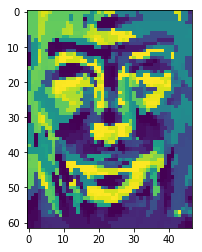

In [36]:
plt.imshow(lbp_features)

In [37]:
import numpy as np
data = np.histogram(lbp_features, bins = range(0,257))
print('data:\n', data)

data:
 (array([180,  42,  15,  32,  41,   5,  15,  35,  23,   1,   4,   4,  47,
         3,  34,  56,  50,   6,   0,   1,   3,   1,   1,   2,  39,   4,
         1,   1,  59,   5,  64,  44,  31,   3,   4,   6,   1,   0,   0,
         4,   2,   1,   1,   1,   6,   0,   2,   3,  44,   1,   7,   2,
         3,   0,   3,   5,  90,   1,   2,   6,  90,   7,  25,  29,  49,
        14,   5,   9,   9,   1,   5,   2,   5,   1,   2,   0,   4,   0,
         2,   9,   1,   0,   0,   0,   1,   0,   1,   1,   9,   2,   1,
         0,  14,   1,   3,   0,  25,   1,   0,   5,   4,   1,   2,   2,
         9,   2,   1,   1,   2,   0,   0,   6,  81,   4,   0,   3,   1,
         1,   3,   0, 133,   5,   1,   1,  74,   3,  23,  14,  25,  48,
         2,  41,   2,   6,   3,  63,   3,   0,   3,   0,   4,   1,   3,
        25,   0,   7,   0,   0,   0,   0,   0,   5,   3,   3,   1,   2,
         4,   3,   0,  11,   1,   1,   0,   6,   0,   1,   0,  10,   1,
         0,   0,   1,   0,   0,   0,   1,   2,   0,   0,

In [38]:
test = lbp_features.reshape(-1)
print(len(data[0]))
print(len(data[1]))

256
257


In [39]:
sum(test == 0)

180

(array([ 180.,   42.,   15.,   32.,   41.,    5.,   15.,   35.,   23.,
           1.,    4.,    4.,   47.,    3.,   34.,   56.,   50.,    6.,
           0.,    1.,    3.,    1.,    1.,    2.,   39.,    4.,    1.,
           1.,   59.,    5.,   64.,   44.,   31.,    3.,    4.,    6.,
           1.,    0.,    0.,    4.,    2.,    1.,    1.,    1.,    6.,
           0.,    2.,    3.,   44.,    1.,    7.,    2.,    3.,    0.,
           3.,    5.,   90.,    1.,    2.,    6.,   90.,    7.,   25.,
          29.,   49.,   14.,    5.,    9.,    9.,    1.,    5.,    2.,
           5.,    1.,    2.,    0.,    4.,    0.,    2.,    9.,    1.,
           0.,    0.,    0.,    1.,    0.,    1.,    1.,    9.,    2.,
           1.,    0.,   14.,    1.,    3.,    0.,   25.,    1.,    0.,
           5.,    4.,    1.,    2.,    2.,    9.,    2.,    1.,    1.,
           2.,    0.,    0.,    6.,   81.,    4.,    0.,    3.,    1.,
           1.,    3.,    0.,  133.,    5.,    1.,    1.,   74.,    3.,
      

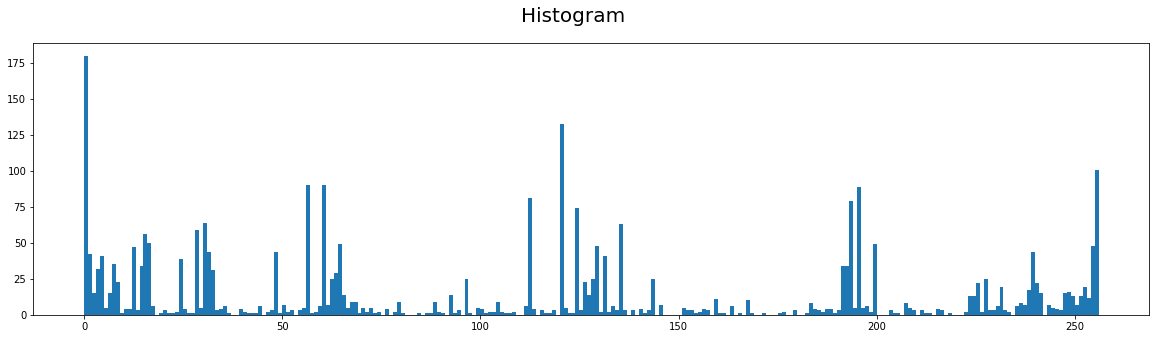

In [40]:
fig = plt.figure(figsize = [20,5])
fig.suptitle('Histogram', fontsize = 20)
plt.hist(lbp_features.reshape(-1),bins=list(range(0,257)))


<Container object of 256 artists>

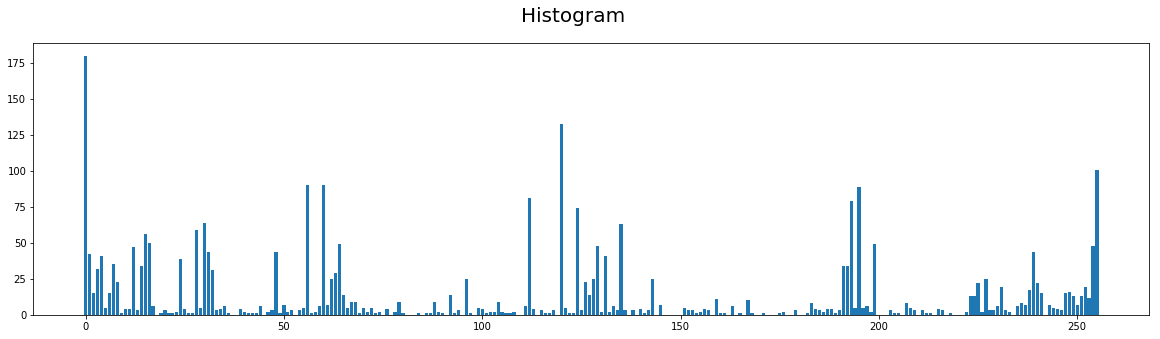

In [41]:
fig2 = plt.figure(figsize = [20,5])
fig2.suptitle('Histogram', fontsize = 20)
plt.bar(range(len(data[0])),data[0], align='center')

# Process for all images in dataset

## Extract LBP features of Images

In [42]:
def get_LBP_feature(mLBP_of_Image):
    return np.histogram(mLBP_of_Image, bins = range(0,257))

In [43]:
#compute local binary pattern
def pre_Compute(image):
    n_points = 8
    radius = 4
    return local_binary_pattern(image, n_points, radius)

In [44]:
#Process all images and store to list
list_Features = []
for image in lfw_people.images:
    lbp_value = pre_Compute(image)
    feature_vector = get_LBP_feature(lbp_value)
    list_Features.append(feature_vector[0])
    


In [46]:
print(len(list_Features)) # to check if list cantained enough element

13233


In [47]:
print(list_Features[0])

[180  42  15  32  41   5  15  35  23   1   4   4  47   3  34  56  50   6
   0   1   3   1   1   2  39   4   1   1  59   5  64  44  31   3   4   6
   1   0   0   4   2   1   1   1   6   0   2   3  44   1   7   2   3   0
   3   5  90   1   2   6  90   7  25  29  49  14   5   9   9   1   5   2
   5   1   2   0   4   0   2   9   1   0   0   0   1   0   1   1   9   2
   1   0  14   1   3   0  25   1   0   5   4   1   2   2   9   2   1   1
   2   0   0   6  81   4   0   3   1   1   3   0 133   5   1   1  74   3
  23  14  25  48   2  41   2   6   3  63   3   0   3   0   4   1   3  25
   0   7   0   0   0   0   0   5   3   3   1   2   4   3   0  11   1   1
   0   6   0   1   0  10   1   0   0   1   0   0   0   1   2   0   0   3
   0   0   1   8   4   3   2   4   4   1   3  34  34  79   5  89   5   6
   2  49   0   0   0   3   1   1   0   8   5   3   0   3   1   1   0   4
   3   0   1   0   0   0   2  13  13  22   2  25   3   3   6  19   3   2
   0   6   8   7  17  44  22  15   0   7   5   4   

In [48]:
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
graph = cosine_similarity(np.array(list_Features))
labels_spectral = spectral_clustering(graph, n_clusters = 5749)

## Using KMEANS to cluster

In [49]:
from sklearn.cluster import KMeans
import time

In [50]:
start = time.time()

nClusters = 5749
kmeans_model = KMeans(nClusters)
face_labels = kmeans_model.fit_predict(list_Features)

end = time.time()

In [25]:
print(len(face_labels))
clustering_time = end - start
print('Time: ', clustering_time, '(s)')

13233
Time:  989.8880825042725 (s)


### Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [28]:
from sklearn.decomposition import PCA

nComponents = 3  # 3-dim
vPCA = PCA(nComponents)
digitData_to_3D = vPCA.fit_transform(lfw_people.data)


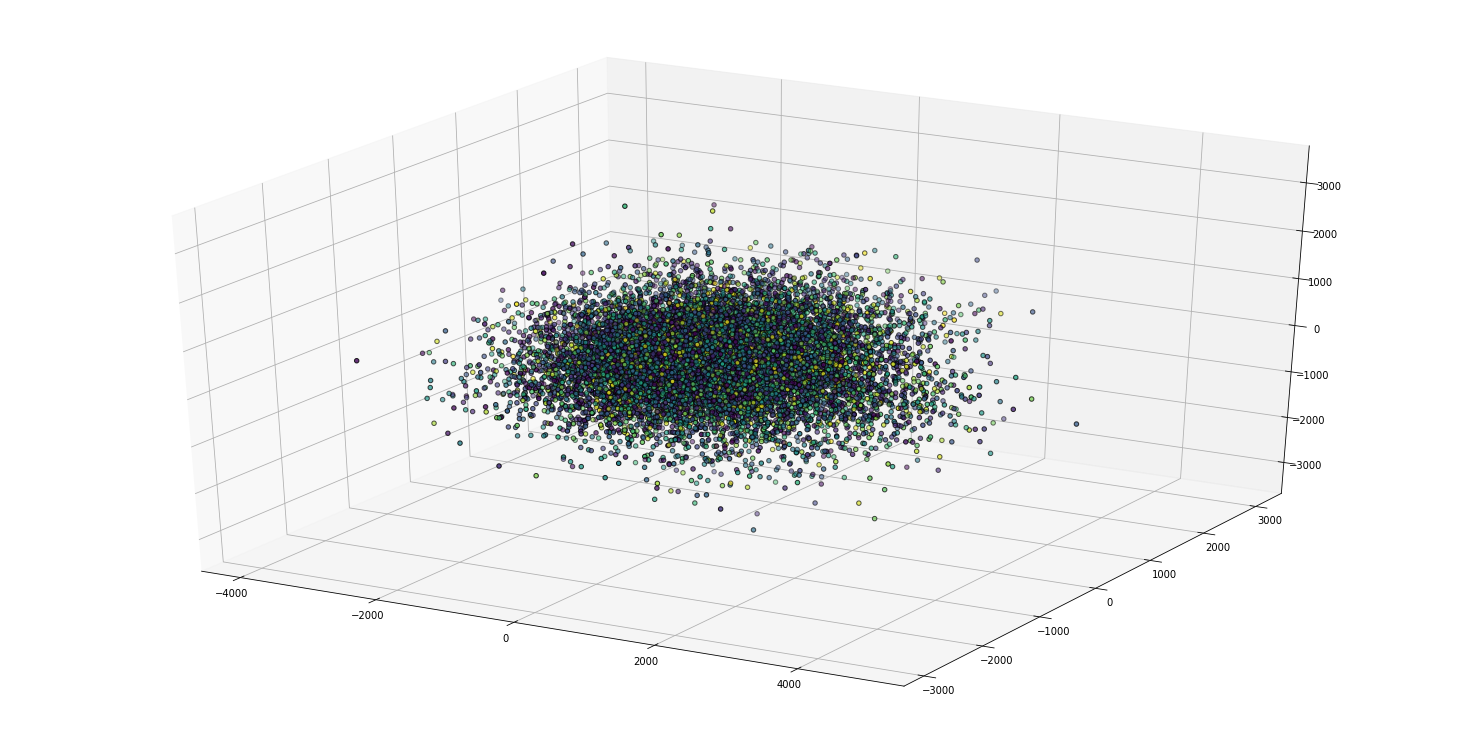

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))
#plt.scatter(digitData_to_3D[:,0], digitData_to_3D[:,1], digitData_to_3D[:,2], c= face_labels, s=10, depthshade=True)
ax = Axes3D(fig)
ax.scatter(digitData_to_3D[:,0], digitData_to_3D[:,1], digitData_to_3D[:,2],
               c=face_labels, edgecolor='k', s = 20)
#set_title('Visulization Result - K-measns')

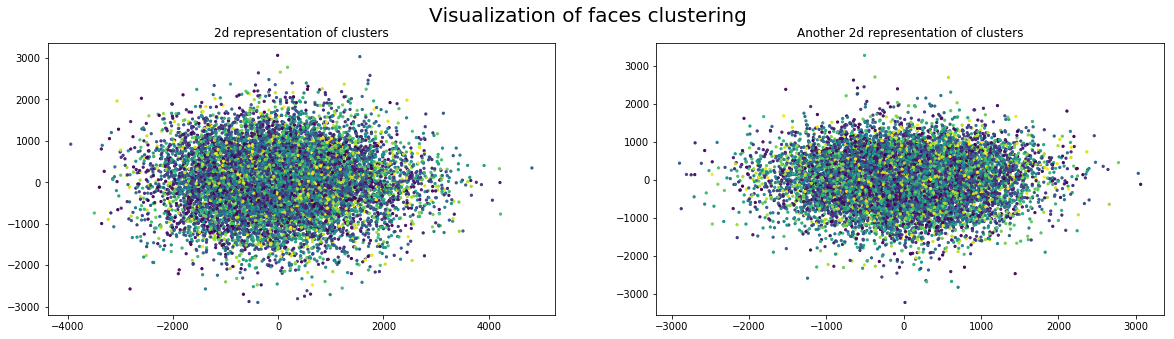

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,5))
fig.suptitle('Visualization of faces clustering', fontsize=20)

ax = fig.add_subplot(1,2,1)
plt.scatter(digitData_to_3D[:,0], digitData_to_3D[:,1], c= face_labels, s=5)
plt.title('2d representation of clusters')

ax = fig.add_subplot(1,2,2)
plt.scatter(digitData_to_3D[:,1], digitData_to_3D[:,2], c= face_labels, s=5)
plt.title('Another 2d representation of clusters')

In [62]:
print(lfw_people.target)
print(len(lfw_people.target))

[5360 3434 3807 ..., 2175  373 2941]
13233
